# console : mlflow ui
# Acc√®s console MLFlow : http://127.0.0.1:5000
# 1 - Chargement & configuration - 18 sec

In [1]:
import sys
import os
sys.path.append('../src')
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', 'src')))

from requirements import *
from src import data_preprocessing as dp
from src import model_training as mt
from src import evaluate as ev
from src import utils

import mlflow
mlflow.set_experiment("Sentiment Analysis Project")

c:\Users\motar\Desktop\1-openclassrooms\AI_Engineer\1-projets\P07\P7_sentiment_MLOps\env_p7_MLOps\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\motar\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!




‚úÖ Toutes les librairies sont pr√©sentes et pr√™tes √† √™tre utilis√©es !



[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\motar\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\motar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\motar\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
Traceback (most recent call last):
  File "c:\Users\motar\Desktop\1-openclassrooms\AI_Engineer\1-projets\P07\P7_sentiment_MLOps\env_p7_MLOps\lib\site-packages\mlflow\store\tracking\file_store.py", line 329, in search_experiments
    exp = self._get_experiment(exp_id, view_type)
  File "c:\Users\motar\Desktop\1-openclassrooms\AI_Engineer\1-projets\P07\P7_sentiment_MLOps\env_p7_MLOps\lib\site-packages\mlflow\store\tracking\file_store.py", line 427, in _get_experiment
    meta = FileStore._read_yaml(experiment_dir

<Experiment: artifact_location='file:///c:/Users/motar/Desktop/1-openclassrooms/AI_Engineer/1-projets/P07/P7_sentiment_MLOps/notebooks/mlruns/906586012259731436', creation_time=1742576058928, experiment_id='906586012259731436', last_update_time=1742576058928, lifecycle_stage='active', name='Sentiment Analysis Project', tags={}>

## 1.1 - D√©marrage automatique du serveur MLflow (Backend SQLite + Artifact Store local)

In [2]:
utils.start_mlflow_server(port = 5000)
mlflow.set_tracking_uri("http://127.0.0.1:5000")
mlflow.set_experiment("projet analyse sentiments")

üöÄ D√©marrage du serveur MLflow (SQLite backend)...
‚úÖ MLflow UI disponible sur : http://127.0.0.1:5000


<Experiment: artifact_location='file:///c:/Users/motar/Desktop/1-openclassrooms/AI_Engineer/1-projets/P07/P7_sentiment_MLOps/notebooks/mlruns/3', creation_time=1742808098078, experiment_id='3', last_update_time=1742808098078, lifecycle_stage='active', name='projet analyse sentiments', tags={}>

## 1.2 - Affichage de la structure dossier

In [3]:
utils.afficher_structure_dossier("..", max_niveaux = 2)

‚îú‚îÄ‚îÄ .dockerignore
‚îú‚îÄ‚îÄ .git
‚îú‚îÄ‚îÄ ‚îú‚îÄ‚îÄ COMMIT_EDITMSG
‚îú‚îÄ‚îÄ ‚îú‚îÄ‚îÄ FETCH_HEAD
‚îú‚îÄ‚îÄ ‚îú‚îÄ‚îÄ HEAD
‚îú‚îÄ‚îÄ ‚îú‚îÄ‚îÄ config
‚îú‚îÄ‚îÄ ‚îú‚îÄ‚îÄ description
‚îú‚îÄ‚îÄ ‚îú‚îÄ‚îÄ hooks
‚îÇ   ‚îú‚îÄ‚îÄ ‚îú‚îÄ‚îÄ applypatch-msg.sample
‚îÇ   ‚îú‚îÄ‚îÄ ‚îú‚îÄ‚îÄ commit-msg.sample
‚îÇ   ‚îú‚îÄ‚îÄ ‚îú‚îÄ‚îÄ fsmonitor-watchman.sample
‚îÇ   ‚îú‚îÄ‚îÄ ‚îú‚îÄ‚îÄ post-update.sample
‚îÇ   ‚îú‚îÄ‚îÄ ‚îú‚îÄ‚îÄ pre-applypatch.sample
‚îÇ   ‚îú‚îÄ‚îÄ ‚îú‚îÄ‚îÄ pre-commit.sample
‚îÇ   ‚îú‚îÄ‚îÄ ‚îú‚îÄ‚îÄ pre-merge-commit.sample
‚îÇ   ‚îú‚îÄ‚îÄ ‚îú‚îÄ‚îÄ pre-push.sample
‚îÇ   ‚îú‚îÄ‚îÄ ‚îú‚îÄ‚îÄ pre-rebase.sample
‚îÇ   ‚îú‚îÄ‚îÄ ‚îú‚îÄ‚îÄ pre-receive.sample
‚îÇ   ‚îú‚îÄ‚îÄ ‚îú‚îÄ‚îÄ prepare-commit-msg.sample
‚îÇ   ‚îú‚îÄ‚îÄ ‚îú‚îÄ‚îÄ push-to-checkout.sample
‚îÇ   ‚îú‚îÄ‚îÄ ‚îú‚îÄ‚îÄ sendemail-validate.sample
‚îÇ   ‚îú‚îÄ‚îÄ ‚îî‚îÄ‚îÄ update.sample
‚îú‚îÄ‚îÄ ‚îú‚îÄ‚îÄ index
‚îú‚îÄ‚îÄ ‚îú‚îÄ‚îÄ info
‚îÇ   ‚îú‚îÄ‚îÄ ‚îî‚îÄ‚îÄ exclude
‚îú‚îÄ‚îÄ ‚îú‚îÄ‚îÄ logs
‚îÇ   ‚îú‚îÄ‚îÄ ‚îú

## 1.3 - Chargement des donn√©es

In [4]:
print(f"üìÇ R√©pertoire courant : {os.getcwd()}")

üìÇ R√©pertoire courant : c:\Users\motar\Desktop\1-openclassrooms\AI_Engineer\1-projets\P07\P7_sentiment_MLOps\notebooks


In [5]:
data_path = "../data/tweets.csv"
if os.path.exists(data_path):
    tweets = pd.read_csv(data_path, encoding = "ISO-8859-1")
    print("‚úÖ Dataset charg√© avec succ√®s !")
else:
    print("‚ùå Le fichier tweets.csv est introuvable.")

‚úÖ Dataset charg√© avec succ√®s !


# 2 - Exploration & nettoyage
## 2.1 - Nettoyage initial

In [6]:
print(tweets.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599999 entries, 0 to 1599998
Data columns (total 6 columns):
 #   Column                                                                                                               Non-Null Count    Dtype 
---  ------                                                                                                               --------------    ----- 
 0   0                                                                                                                    1599999 non-null  int64 
 1   1467810369                                                                                                           1599999 non-null  int64 
 2   Mon Apr 06 22:19:45 PDT 2009                                                                                         1599999 non-null  object
 3   NO_QUERY                                                                                                             1599999 non-null  object
 4   _

In [7]:
# Renommage des colonnes
tweets.columns = ["label", "id", "date", "query", "user", "text"]

In [8]:
# Suppression des colonnes inutiles
tweets = tweets.drop(columns=["id", "date", "query", "user"])

In [9]:
# Conversion des labels (0 et 4 ‚Üí 0 et 1)
tweets['label'] = tweets['label'].map({0: 0, 4: 1})

## 2.2 - Suppression des doublons sur la colonne "text"

In [10]:
before = len(tweets)
tweets = tweets.drop_duplicates(subset = ["text"], keep = "first").reset_index(drop = True)
after = len(tweets)
print(f"‚úÖ Suppression des doublons effectu√©e : {before - after} doublons supprim√©s.")
tweets = tweets.reset_index(drop = True)

‚úÖ Suppression des doublons effectu√©e : 18534 doublons supprim√©s.


## 2.3 - Nettoyage avanc√©

In [11]:
tweets_cleaned = dp.preprocess_tweets_parallel(tweets)

‚úÖ Chargement des tweets nettoy√©s depuis ../models_saved/cleaned_tweets.pkl


# 3 - Vader scoring

In [12]:
vader_scores = dp.compute_vader_scores(tweets_cleaned)

üöÄ Nouveau run d√©marr√© : a6688551aa6846d0af1eaf71fc4349e3
‚úÖ Scores VADER charg√©s depuis ../models_saved/vader_scores.pkl...

üìä Rapport de classification VADER :
              precision    recall  f1-score   support

           0       0.81      0.43      0.56    790184
           1       0.61      0.90      0.73    791281

    accuracy                           0.67   1581465
   macro avg       0.71      0.67      0.65   1581465
weighted avg       0.71      0.67      0.65   1581465

üèÉ View run calm-slug-701 at: http://127.0.0.1:5000/#/experiments/2/runs/a6688551aa6846d0af1eaf71fc4349e3
üß™ View experiment at: http://127.0.0.1:5000/#/experiments/2
‚úÖ Run termin√©.


# 4 - Vectorisation des tweets

In [13]:
sample_size = 15000  # Taille √©chantillon USE (modifiable)

tweets_sampled = tweets_cleaned.sample(n = sample_size, random_state = 70).reset_index(drop = True)

X_bow, X_tfidf, X_fasttext, X_use, y_use = dp.vectorize_and_save(
    tweets_cleaned['text'], tweets_sampled['text'],
    tweets_cleaned['label'], tweets_sampled['label'],
    force_revectorize = True
)

üöÄ Nouveau run d√©marr√© : 385ae69ef09045bfb4cbf46429cb27d2
üöÄ Vectorisation en cours...
üèÉ View run smiling-sow-897 at: http://127.0.0.1:5000/#/experiments/2/runs/385ae69ef09045bfb4cbf46429cb27d2
üß™ View experiment at: http://127.0.0.1:5000/#/experiments/2
üöÄ Nouveau run d√©marr√© : 9e3efe9f6c1e40e2bb1e520cf16a457a
üöÄ Vectorisation BoW et TF-IDF en cours...
üöÄ Entra√Ænement du mod√®le FastText...
üöÄ Chargement Universal Sentence Encoder...



‚úÖ Vectorisation termin√©e.
üèÉ View run able-ray-837 at: http://127.0.0.1:5000/#/experiments/2/runs/9e3efe9f6c1e40e2bb1e520cf16a457a
üß™ View experiment at: http://127.0.0.1:5000/#/experiments/2
‚úÖ Run termin√©.
‚úÖ Vectorizer sauvegard√©.
‚úÖ Run termin√©.


# 5 - Mod√©lisation Classique (TF-IDF + R√©gression Logistique) - 2 min 08

In [14]:
X_tfidf_train, X_tfidf_test, y_train, y_test = train_test_split(
    X_tfidf, tweets_cleaned['label'], test_size = 0.2, random_state = 70, stratify=tweets_cleaned['label']
)
# log_reg_model = mt.train_logistic_regression_with_cv(X_tfidf_train, y_train)
log_reg_model = mt.train_logistic_regression_with_cv(X_tfidf_train, y_train, force_retrain = True)

üöÄ Nouveau run d√©marr√© : d6e299199bdf4bf0bd995a1925767f4d
üîÑ Entra√Ænement R√©gression Logistique...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
‚úÖ Mod√®le sauvegard√© sous ../models_saved/log_reg_model.pkl


2025/03/24 18:35:23 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'sentiment_model_logreg' already exists. Creating a new version of this model...
2025/03/24 18:35:23 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: sentiment_model_logreg, version 3
Created version '3' of model 'sentiment_model_logreg'.


üèÉ View run caring-bird-225 at: http://127.0.0.1:5000/#/experiments/2/runs/d6e299199bdf4bf0bd995a1925767f4d
üß™ View experiment at: http://127.0.0.1:5000/#/experiments/2
üöÄ Nouveau run d√©marr√© : acdf2a671a4c47069dfda66d569ad0bb

‚è±Ô∏è [R√©gression Logistique] - Fin : 125.95 sec | CPU: 6.0% | RAM: 42.0%
üèÉ View run sincere-gull-305 at: http://127.0.0.1:5000/#/experiments/2/runs/acdf2a671a4c47069dfda66d569ad0bb
üß™ View experiment at: http://127.0.0.1:5000/#/experiments/2
‚úÖ Run termin√©.
‚úÖ Run termin√©.


# 6 - Mod√®les Avanc√©s (Random Forest / LightGBM / LSTM)
## 6.1 - FastText supervis√©

In [15]:
# mt.train_fasttext_supervised()
mt.train_fasttext_supervised(force_retrain = True)

üöÄ Nouveau run d√©marr√© : 26bdb5d7f1ad445da822f7afb3425684
üöÄ Entra√Ænement FastText supervis√©...
‚úÖ Mod√®le FastText sauvegard√© sous ../models_saved/fasttext_model.ftz


Registered model 'sentiment_model_fasttext' already exists. Creating a new version of this model...
2025/03/24 18:35:33 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: sentiment_model_fasttext, version 4


üèÉ View run valuable-flea-659 at: http://127.0.0.1:5000/#/experiments/2/runs/26bdb5d7f1ad445da822f7afb3425684
üß™ View experiment at: http://127.0.0.1:5000/#/experiments/2
‚úÖ Run termin√©.


Created version '4' of model 'sentiment_model_fasttext'.


## 6.1 - FastText + Random Forest - 4 min 51

In [16]:
X_ft_train, X_ft_test, y_train, y_test = train_test_split(
    X_fasttext, tweets_cleaned['label'], test_size = 0.2, random_state = 70, stratify = tweets_cleaned['label']
)
# rf_model = mt.train_random_forest(X_ft_train, y_train)
rf_model = mt.train_random_forest(X_ft_train, y_train, force_retrain = True)

üöÄ Nouveau run d√©marr√© : dc60ab9712b74b89b84ff78b33e2ef90
‚úÖ Mod√®le RandomForest sauvegard√© sous ../models_saved/rf_model.pkl


2025/03/24 18:40:08 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'sentiment_model_rf' already exists. Creating a new version of this model...
2025/03/24 18:40:08 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: sentiment_model_rf, version 5
Created version '5' of model 'sentiment_model_rf'.


üèÉ View run tasteful-chimp-108 at: http://127.0.0.1:5000/#/experiments/2/runs/dc60ab9712b74b89b84ff78b33e2ef90
üß™ View experiment at: http://127.0.0.1:5000/#/experiments/2
üöÄ Nouveau run d√©marr√© : 5460e71e51e0458087044b135c6895e2

‚è±Ô∏è [RandomForest] - Fin : 274.35 sec | CPU: 23.6% | RAM: 48.0%
üèÉ View run gregarious-asp-951 at: http://127.0.0.1:5000/#/experiments/2/runs/5460e71e51e0458087044b135c6895e2
üß™ View experiment at: http://127.0.0.1:5000/#/experiments/2
‚úÖ Run termin√©.
‚úÖ Run termin√©.


## 6.2 - FastText + LSTM - 7 min 44

In [ ]:
# lstm_model, (X_ft_test_reshaped, y_ft_test), history = mt.train_lstm_model(X_fasttext, tweets_cleaned['label'])
lstm_model, (X_ft_test_reshaped, y_ft_test), history = mt.train_lstm_model(X_fasttext, tweets_cleaned['label'], force_retrain = True)

üöÄ Nouveau run d√©marr√© : 714e88acda414ca883148792ca87313d


c:\Users\motar\Desktop\1-openclassrooms\AI_Engineer\1-projets\P07\P7_sentiment_MLOps\env_p7_MLOps\lib\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


üöÄ Entra√Ænement LSTM...


Epoch 1/10
4943/4943 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 37s 7ms/step - accuracy: 0.7473 - loss: 0.5136 - val_accuracy: 0.7597 - val_loss: 0.4925
Epoch 2/10
4943/4943 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 32s 6ms/step - accuracy: 0.7597 - loss: 0.4930 - val_accuracy: 0.7649 - val_loss: 0.4844
Epoch 3/10
4943/4943 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 34s 7ms/step - accuracy: 0.7657 - loss: 0.4840 - val_accuracy: 0.7670 - val_loss: 0.4798
Epoch 4/10
4943/4943 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 41s 8ms/step - accuracy: 0.7677 - loss: 0.4795 - val_accuracy: 0.7696 - val_loss: 0.4761
Epoch 5/10
4943/4943 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 28s 6ms/step - accuracy: 0.7692 - loss: 0.4765 - val_accuracy: 0.7708 - val_loss: 0.4734
Epoch 6/10
4943/4943 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 36s 7ms/step - accuracy: 0.7710 - loss: 0.4737 - val_accuracy: 

## 6.3 - USE + LightGBM

In [ ]:
X_use_train, X_use_test, y_use_train, y_use_test = train_test_split(
    X_use, y_use, test_size = 0.2, random_state = 70, stratify = y_use
)
# lgbm_model = mt.train_lightgbm(X_use_train, y_use_train, X_use_test, y_use_test)
lgbm_model = mt.train_lightgbm(X_use_train, y_use_train, X_use_test, y_use_test, force_retrain = True)

üöÄ Nouveau run d√©marr√© : 8c16e1b951ab4a0ab6cc7fe7a6fc9cf4
üöÄ Entra√Ænement LightGBM...
Training until validation scores don't improve for 10 rounds
[10]	valid_0's binary_logloss: 0.597038
[20]	valid_0's binary_logloss: 0.572921
[30]	valid_0's binary_logloss: 0.565325
[40]	valid_0's binary_logloss: 0.559
[50]	valid_0's binary_logloss: 0.556823
[60]	valid_0's binary_logloss: 0.555709
[70]	valid_0's binary_logloss: 0.555127
[80]	valid_0's binary_logloss: 0.557184
Early stopping, best iteration is:
[70]	valid_0's binary_logloss: 0.555127
‚úÖ Mod√®le LightGBM sauvegard√© sous ../models_saved/lgbm_model.txt


2025/03/24 18:28:10 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'sentiment_model_lgbm' already exists. Creating a new version of this model...
2025/03/24 18:28:10 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: sentiment_model_lgbm, version 2
Created version '2' of model 'sentiment_model_lgbm'.


üèÉ View run enthused-shrimp-194 at: http://127.0.0.1:5000/#/experiments/2/runs/8c16e1b951ab4a0ab6cc7fe7a6fc9cf4
üß™ View experiment at: http://127.0.0.1:5000/#/experiments/2
üöÄ Nouveau run d√©marr√© : 58f214600c594d318e0559e28a33b7cf

‚è±Ô∏è [LightGBM] - Fin : 5.65 sec | CPU: 48.0% | RAM: 49.6%
üèÉ View run fun-bat-257 at: http://127.0.0.1:5000/#/experiments/2/runs/58f214600c594d318e0559e28a33b7cf
üß™ View experiment at: http://127.0.0.1:5000/#/experiments/2
‚úÖ Run termin√©.
‚úÖ Run termin√©.


## 6.4 - DistilBERT
### 6.4.1 - Pr√©paration

In [ ]:
df_sample = dp.prepare_distilbert_dataset(tweets_cleaned)
tokenized = dp.tokenize_distilbert_dataset(df_sample)

üöÄ Nouveau run d√©marr√© : 56b6977cf1834af8b2eee771d40e55d3
‚úÖ Dataset DistilBERT existant. Chargement...
üèÉ View run inquisitive-sow-335 at: http://127.0.0.1:5000/#/experiments/2/runs/56b6977cf1834af8b2eee771d40e55d3
üß™ View experiment at: http://127.0.0.1:5000/#/experiments/2
‚úÖ Run termin√©.
üöÄ Nouveau run d√©marr√© : d8d2479aee8347269ffe3d78f233c07f
‚úÖ Tokenized dataset d√©j√† existant. Chargement depuis ../models_saved/tokenized_distilbert_dataset...
üèÉ View run bright-elk-732 at: http://127.0.0.1:5000/#/experiments/2/runs/d8d2479aee8347269ffe3d78f233c07f
üß™ View experiment at: http://127.0.0.1:5000/#/experiments/2
‚úÖ Run termin√©.


### 6.2.2 - Fine-tuning 

In [ ]:
model, trainer, _ = mt.train_distilbert_model(tokenized)
# model, trainer, _ = mt.train_distilbert_model(tokenized, force_retrain = True)

üöÄ Nouveau run d√©marr√© : 3a77aeab5d8f400cba93236e1c592a4e
‚úÖ Mod√®le DistilBERT d√©j√† fine-tun√©. Chargement depuis ../models_saved/distilbert_model...
üèÉ View run unruly-crab-99 at: http://127.0.0.1:5000/#/experiments/2/runs/3a77aeab5d8f400cba93236e1c592a4e
üß™ View experiment at: http://127.0.0.1:5000/#/experiments/2
‚úÖ Run termin√©.


# 7 - Evaluation

In [ ]:
distilbert_acc, distilbert_f1 = ev.evaluate_distilbert_model(model, tokenized)

üöÄ Nouveau run d√©marr√© : b5c11c059d3d448ba20005c717502ef9
‚úÖ R√©sultats d'√©valuation d√©j√† disponibles. Chargement...

üìä Rapport DistilBERT :
              precision    recall  f1-score   support

           0       0.85      0.84      0.84     10038
           1       0.84      0.85      0.84      9962

    accuracy                           0.84     20000
   macro avg       0.84      0.84      0.84     20000
weighted avg       0.84      0.84      0.84     20000

üèÉ View run smiling-wren-617 at: http://127.0.0.1:5000/#/experiments/2/runs/b5c11c059d3d448ba20005c717502ef9
üß™ View experiment at: http://127.0.0.1:5000/#/experiments/2
‚úÖ Run termin√©.


# 8 - Comparaison finale des mod√®les

In [ ]:
models_dict = {
    'logreg': log_reg_model,
    'rf': rf_model,
    'lstm': lstm_model,
    'lgbm': lgbm_model,
    'distilbert_metrics': {
        'accuracy': distilbert_acc,
        'f1': distilbert_f1
    }
}

datasets_dict = {
    'tfidf': {'X_test': X_tfidf_test, 'y_test': y_test},
    'fasttext': {'X_test': X_ft_test, 'y_test': y_test},
    'lstm': (X_ft_test_reshaped, y_ft_test),
    'use': {'X_test': X_use_test, 'y_test': y_use_test}
}

üöÄ Nouveau run d√©marr√© : 14fae9e28175464a877710f42b5eb5d1

üìä R√©sultats pour : logreg
              precision    recall  f1-score   support

           0       0.77      0.72      0.75    158037
           1       0.74      0.79      0.76    158256

    accuracy                           0.76    316293
   macro avg       0.76      0.76      0.76    316293
weighted avg       0.76      0.76      0.76    316293



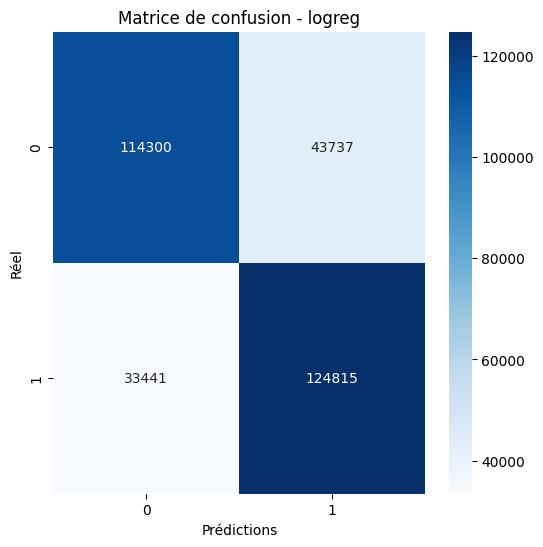


üìä R√©sultats pour : rf
              precision    recall  f1-score   support

           0       0.73      0.75      0.74    158037
           1       0.74      0.72      0.73    158256

    accuracy                           0.73    316293
   macro avg       0.73      0.73      0.73    316293
weighted avg       0.73      0.73      0.73    316293



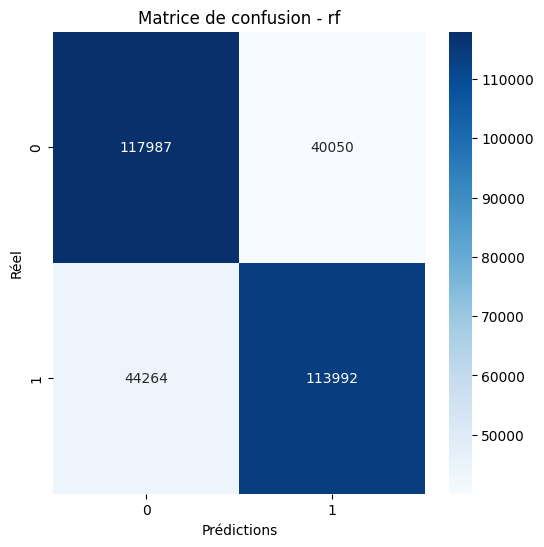

9885/9885 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 9s 845us/step

üìä R√©sultats pour : lstm
              precision    recall  f1-score   support

           0       0.78      0.77      0.77    158037
           1       0.77      0.78      0.78    158256

    accuracy                           0.78    316293
   macro avg       0.78      0.78      0.78    316293
weighted avg       0.78      0.78      0.78    316293



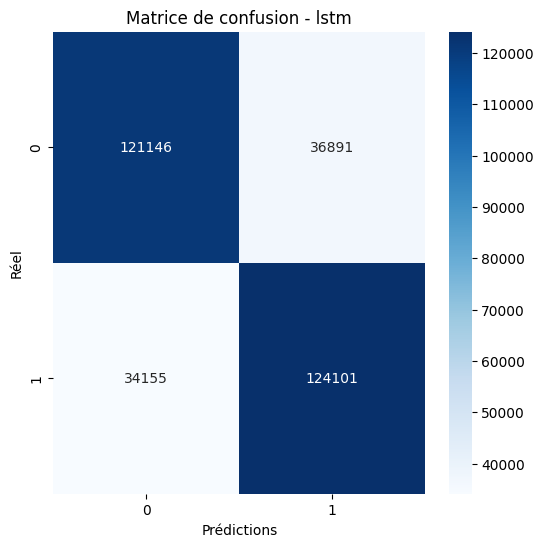


üìä R√©sultats pour : lgbm
              precision    recall  f1-score   support

           0       0.72      0.71      0.71      1505
           1       0.71      0.72      0.72      1495

    accuracy                           0.72      3000
   macro avg       0.72      0.72      0.72      3000
weighted avg       0.72      0.72      0.72      3000



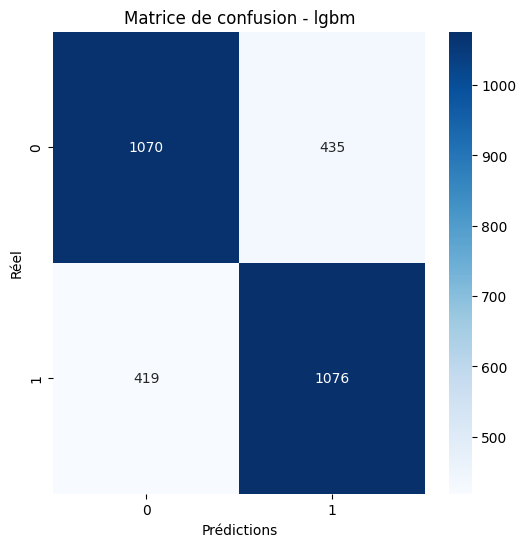


üìä Comparaison finale des mod√®les :


Mod√®le  Accuracy  F1-score
0                logreg    0.7560    0.7638
1                    rf    0.7334    0.7300
2                  lstm    0.7754    0.7775
3                  lgbm    0.7153    0.7159
4  DistilBERT fine-tun√©    0.8423    0.8427

üèÉ View run whimsical-lark-463 at: http://127.0.0.1:5000/#/experiments/2/runs/14fae9e28175464a877710f42b5eb5d1
üß™ View experiment at: http://127.0.0.1:5000/#/experiments/2
‚úÖ Run termin√©.


In [ ]:
df_results = ev.get_all_model_scores(models_dict, datasets_dict)

# 9 - Tracking MLFlow

In [ ]:
y_pred = log_reg_model.predict(X_tfidf_test)
with mlflow.start_run(run_name="Logistic Regression final metrics"):
    mlflow.log_param("model", "Logistic Regression")
    mlflow.log_metric("accuracy", accuracy_score(y_test, y_pred))
    mlflow.log_metric("f1_score", f1_score(y_test, y_pred))

üèÉ View run Logistic Regression final metrics at: http://127.0.0.1:5000/#/experiments/2/runs/a5b1b98b6d914317bf0d69495abfd57f
üß™ View experiment at: http://127.0.0.1:5000/#/experiments/2


In [ ]:
if mlflow.active_run() is not None:
    mlflow.end_run()

In [ ]:
with mlflow.start_run():
    # entra√Ænement mod√®le, log params & metrics
    mlflow.log_param("model", "Logistic Regression")
    mlflow.log_metric("accuracy", accuracy_score(y_test, y_pred))

üèÉ View run big-fowl-347 at: http://127.0.0.1:5000/#/experiments/2/runs/b15618770e944f1b9e65a6e923af788d
üß™ View experiment at: http://127.0.0.1:5000/#/experiments/2


# A d√©sactiver en production

In [ ]:
utils.launch_mlflow_ui()

üöÄ MLFlow UI lanc√© sur http://127.0.0.1:5000


In [ ]:
# mlflow.end_run()  # Pour stopper tout run en cours
